In [17]:
import numpy as np
import csv
from matplotlib import pyplot as plt

In [18]:

with open('mkl.csv', 'r') as f:
    reader = csv.reader(f)
    n_data_mkl = list(reader)
with open('oblas.csv', 'r') as f:
    reader = csv.reader(f)
    n_data_oblas = list(reader)
with open('blis.csv', 'r') as f:
    reader = csv.reader(f)
    n_data_blis = list(reader)




with open('../../../core_scalability/EPYC/CLOSE/blis.csv', 'r') as f:
    reader = csv.reader(f)
    data_blis = list(reader)

with open('../../../core_scalability/EPYC/CLOSE/oblas.csv', 'r') as f:
    reader = csv.reader(f)
    data_oblas = list(reader)

with open('../../../core_scalability/EPYC/CLOSE/mkl.csv', 'r') as f:
    reader = csv.reader(f)
    data_mkl = list(reader)


In [19]:
def PLOT (data): 
    data_array = np.array(data[1:], dtype=float)

    data_per_dimension = np.empty((128, 5, 4))
    j = 0
    for i in range(0,128):
            data_per_dimension[i]=  data_array[j:j+5,:]
            j = j + 5

    method_sd = np.empty((128, 4))
    method = np.empty((128, 4))
    for i in range(0,128):
            method[i]=  np.mean(data_per_dimension[i], axis=0)
            method_sd[i]=  np.std(data_per_dimension[i], axis=0)

    return method, method_sd
    

In [20]:

n_mkl, n_std_mkl=PLOT(n_data_mkl)
n_oblas, n_std_oblas=PLOT(n_data_oblas)
n_blis, n_std_blis=PLOT(n_data_blis)

mkl, std_mkl=PLOT(data_mkl)
oblas, std_oblas=PLOT(data_oblas)
blis, std_blis=PLOT(data_blis)


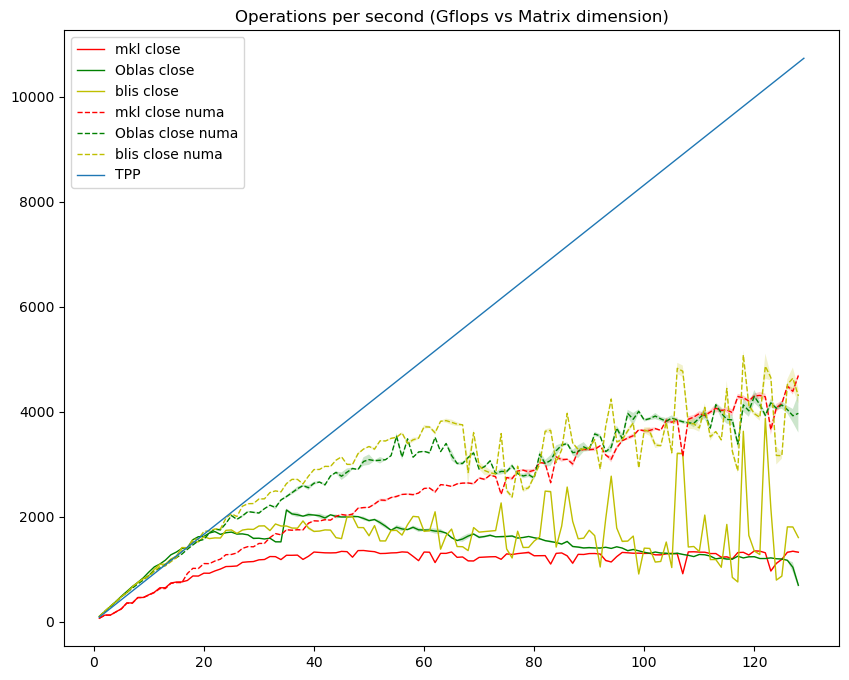

In [21]:
plt.figure(figsize=(10,8))
plt.plot(range(1,129,1), mkl[:,3], color='r', label='mkl close', linewidth=1)
plt.fill_between(range(1,129,1), mkl[:,3]+std_mkl[:,3], mkl[:,3]-std_mkl[:,3], facecolor='r', alpha=0.2 )

plt.plot(range(1,129,1), oblas[:,3], color='g', label='Oblas close', linewidth=1)
plt.fill_between(range(1,129,1), oblas[:,3]+std_oblas[:,3], oblas[:,3]-std_oblas[:,3], facecolor='g', alpha=0.2 )

plt.plot(range(1,129,1), blis[:,3], color='y', label='blis close', linewidth=1)
plt.fill_between(range(1,129,1), blis[:,3]+std_blis[:,3], blis[:,3]-std_blis[:,3], facecolor='y', alpha=0.2 )




plt.plot(range(1,129,1), n_mkl[:,3], color='r', label='mkl close numa', linewidth=1, linestyle='dashed')
plt.fill_between(range(1,129,1), n_mkl[:,3]+n_std_mkl[:,3], n_mkl[:,3]-n_std_mkl[:,3], facecolor='r', alpha=0.2 )

plt.plot(range(1,129,1), n_oblas[:,3], color='g', label='Oblas close numa', linewidth=1, linestyle='dashed')
plt.fill_between(range(1,129,1), n_oblas[:,3]+n_std_oblas[:,3], n_oblas[:,3]-n_std_oblas[:,3], facecolor='g', alpha=0.2 )

plt.plot(range(1,129,1), n_blis[:,3], color='y', label='blis close numa', linewidth=1, linestyle='dashed')
plt.fill_between(range(1,129,1), n_blis[:,3]+n_std_blis[:,3], n_blis[:,3]-n_std_blis[:,3], facecolor='y', alpha=0.2 )


x = np.linspace(1, 129, 128)
y = 83.2*x
plt.plot(x, y, label='TPP', linewidth=1)

plt.title("Operations per second (Gflops vs Matrix dimension)")
plt.legend()
plt.show()
